<a href="https://colab.research.google.com/github/Naym0/super-eureka/blob/master/Task1/ML_Task_One_Gradient_descent%2C_Lasso_Regularization%2C_Ridge_Reugalarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
L = 0.0001 #Learning rate
epoch = 100 # iterations
errors_per_epoch = {}
data = pd.read_csv('data.csv', header=0)

X = data['size_in_sq_ft']
Y = data['price_x1000_sh']
N = float(len(X))

In [0]:
def mse(N, Y, Y_hat):
  return (1/N)*sum((Y-Y_hat)**2)

In [0]:
def gradient_descent_fit(X, Y, epochs=100, LR=0.0001):
  m = 0
  c = 0
  N = float(len(X))
  errors_per_epoch = {}

  for i in range(epoch):
    Y_hat = m*X+c

    D_m = (-2/N)*sum(X*(Y-Y_hat)) # derivative with respect to m
    D_c = (-2/N)*sum(Y-Y_hat) # derivative with respect to c
    m=m-(L*D_m)
    c=c-(L*D_c)

    errors_per_epoch[i]=(mse(N, Y, Y_hat))

  return dict({'Y_hat': Y_hat, 'm': m , 'c': c, 'errors_per_epoch': errors_per_epoch})

In [0]:
def l1_fit(X, Y, epochs=100, LR=0.0001, L1_lambda=1.5):
  m = 1
  c = 0
  N = float(len(X))
  errors_per_epoch = {}

  for i in range(epochs):
    Y_hat = m*X+c

    D_m = (-2/N)*sum(X*(Y-Y_hat)) - (L1_lambda*(m/abs(m))) # derivative with respect to m
    D_c = (-2/N)*sum(Y-Y_hat) # derivative with respect to c
    m = m - (LR*D_m)
    c = c - (LR*D_c)

    errors_per_epoch[i]=(mse(N, Y, Y_hat))

  return dict({'Y_hat': Y_hat, 'm': m , 'c': c, 'errors_per_epoch': errors_per_epoch})

In [0]:
def l2_fit(X, Y, epochs=100, LR=0.0001, L2_lambda=1.5):
  m = 0
  c = 0
  N = float(len(X))
  errors_per_epoch = {}

  for i in range(epochs):
    Y_hat = m*X+c

    D_m = (-2/N)*sum(X*(Y-Y_hat)) - (2*L2_lambda*(m)) # derivative with respect to m
    D_c = (-2/N)*sum(Y-Y_hat) # derivative with respect to c
    m = m - (LR*D_m)
    c = c - (LR*D_c)

    errors_per_epoch[i]=(mse(N, Y, Y_hat))

  return dict({'Y_hat': Y_hat, 'm': m , 'c': c, 'errors_per_epoch': errors_per_epoch})

# Calculations for L1 and L2
![alt text](https://lh3.googleusercontent.com/UL_3xFI9p88rQVMI4iqOUeCKgH3KKph_bGdn7Obu4ROVNvtcu0L3-5eDKacWew9g3Ug7PvfTYiEHJQ9FN78v1Lwpsm7vm0T9KNDniROcXLElbzd1eYNsDaVbK5C_ngQbY5QtUOLNzK9U9bXiYn8dScLFIP9XPzqNQrq93FgvpKtkv_W7-Cc1F9CDJEcsXYEnRp572xgdUPuEKO7VFhZS9f1TyNk9tLPonhGl2eE-lzSP0jq-Mm5Ze9d97_7772Vbe5fCw2pWtKJMdIvISlpkyl39_UeuL8wbxvSYDf4fVK7M5kERp1GK59CdYTmhmVTVpoEZJAEjspu2_-Bvzpq4Nd43EfWlWOZ2kEqYcPfflLopj-P_b9JrrkxGqtnqj3U4n63A0UhkWfaVRui4rUpz0RmpcgRq2noAnvzNRRYkgNd_fdKCgNq6XTKmF3TG2Qp41TcScrxD7PXZlYXeZDXN4FXnZY4IEOFqOP5J53lsC6F_U0KVUcbeKflC3E3PZv3BNe5EudtwoBjjIrCdyQpuWFGKERROcuNHGIuwlYIcWzCe2vbPtt_SrwtiPg25jhguK21_xPRSrUS140cp6EImD3BGklan2cffB95a9vtBiGgAAP8mBPhkmRsWwR30Bb23WSZFu6SAkvNthPTr_-BVxcLazqUfdirjl1zRAB_aDhhg4swujFhzGG70Apyl=w1191-h912-no?authuser=0)

=== L (Gradient descent) === 
 Final m: 1.4788027175308887 Final c: 0.03507497059521459
=== L1 === 
 Final m: 1.4794952303588504 Final c: 0.01515400542226122
=== L2 === 
 Final m: 1.4797098705519693 Final c: 0.03423810414223522


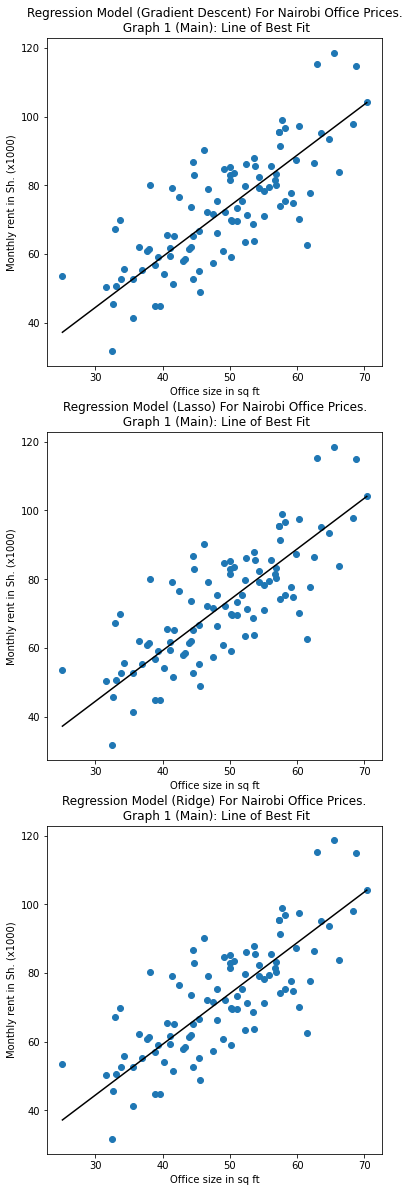

In [22]:
gd_train = gradient_descent_fit(X, Y, epochs=100, LR=0.001)
print("=== L (Gradient descent) === \n", "Final m: {m} Final c: {c}".format_map(gd_train))

l1_train = l1_fit(X, Y, epochs=100, L1_lambda=1.5)
print("=== L1 === \n", "Final m: {m} Final c: {c}".format_map(l1_train))

l2_train = l2_fit(X, Y, epochs=100, L2_lambda=1.5)
print("=== L2 === \n", "Final m: {m} Final c: {c}".format_map(l2_train))

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, gridspec_kw={'top':4})

ax1.scatter(X, Y)
ax1.set_title('Regression Model (Gradient Descent) For Nairobi Office Prices.\n Graph 1 (Main): Line of Best Fit')
ax1.set(xlabel='Office size in sq ft', ylabel='Monthly rent in Sh. (x1000)')
ax1.plot([min(X), max(X)], [min(gd_train['Y_hat']), max(gd_train['Y_hat'])], color="black")

ax2.scatter(X, Y)
ax2.set_title('Regression Model (Lasso) For Nairobi Office Prices.\n Graph 1 (Main): Line of Best Fit')
ax2.set(xlabel='Office size in sq ft', ylabel='Monthly rent in Sh. (x1000)')
ax2.plot([min(X), max(X)], [min(l1_train['Y_hat']), max(l1_train['Y_hat'])], color="black")

ax3.scatter(X, Y)
ax3.set_title('Regression Model (Ridge) For Nairobi Office Prices.\n Graph 1 (Main): Line of Best Fit')
ax3.set(xlabel='Office size in sq ft', ylabel='Monthly rent in Sh. (x1000)')
ax3.plot([min(X), max(X)], [min(l2_train['Y_hat']), max(l2_train['Y_hat'])], color="black")

When running L1(Lasso), the error you get is when m=0. This is because of the derivative of absolute values. To fix it, ignore 0 values and initialize m to 1